In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
df= pd.read_csv("bank-additional-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Data cleaning is not required as there are no null entries

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [9]:
#percent of clients who subscribed to term deposit
conversion_rate = df['y'].value_counts(normalize=True)['yes'] * 100
print(f'conversion rate: {conversion_rate}')

conversion rate: 11.265417111780131


In [10]:
#comparing with previous campign 
df.groupby('poutcome')['y'].value_counts(normalize=True).unstack()

y,no,yes
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911678,0.088322
success,0.348871,0.651129


In [11]:
#no.of clients in each categeory in previous campign 
df['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

The campaign shows strong retention with past successful clients converting around 65% but this only makes up to around 3% of the clients.
The overall 11% conversion rate is dragged down by poor performance with new leads (91% rejection) and previously failed contacts (86% rejection), highlighting a need for better targeting of new prospects while maintaining the successful retention strategy.

### EDA

#### Term Deposit Conversion Rates By Job Types

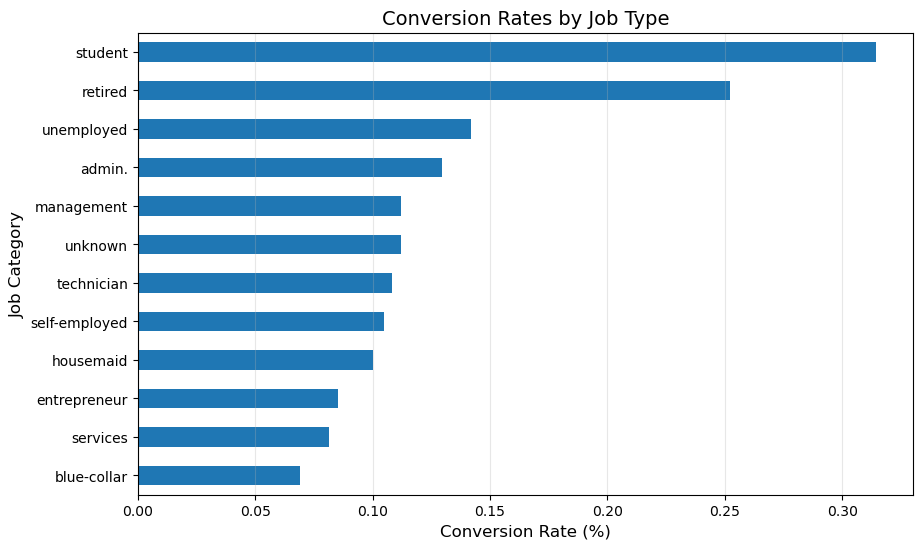

In [12]:
# impact of the campiagn based on job types
#conversion rate by job type in ascending order
job_conv = df.groupby('job')['y'].value_counts(normalize=True).unstack()['yes'].sort_values()

#ploting the values
plt.figure(figsize=(10, 6))
job_conv.plot(kind='barh')
plt.title('Conversion Rates by Job Type', fontsize=14)
plt.xlabel('Conversion Rate (%)', fontsize=12)
plt.ylabel('Job Category', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.show()

1. Students (31.4%) & Retirees (25.2%) showed high conversions thus prioritize resource allocation to these groups
2. Management (11.2%) & Technicians (10.8%) underperformed despite income stability suggesting need for tailored messaging around their concerned priorities
3. Blue-Collar (6.9%) & Services (8.1%) have lowest conversions thus drain marketing so consider deprioritization of these groups

#### Term Deposit Conversion Rates By Age Group

C:\Users\bhavy\AppData\Local\Temp\ipykernel_7976\3936033902.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_conv = df.groupby(age_groups)['y'].apply(lambda x: (x == 'yes').mean()).reset_index()


     age         y
0    <30  0.152242
1  30-50  0.091418
2    50+  0.150696


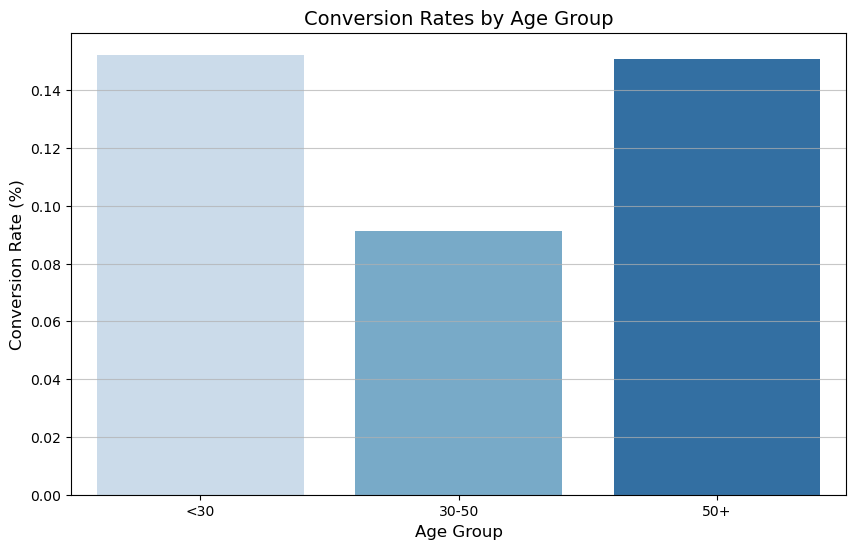

In [13]:
#impact of the campign on various age groups
#Creating age groups and finding conversion rate by age group
age_groups = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['<30', '30-50', '50+'])
age_conv = df.groupby(age_groups)['y'].apply(lambda x: (x == 'yes').mean()).reset_index()
print(age_conv)
age_conv.columns = ['Age Group', 'Conversion Rate']

# Creating bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Conversion Rate',hue='Age Group', data=age_conv,palette='Blues')
plt.title('Conversion Rates by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.show()


The data reveals a U-shaped conversion pattern by age, with younger (<30 years) and older (50+ years) clients showing strong conversion rates of around 15.2% and 15.1% respectively, likely driven by savings goals and retirement planning, while the 30-50 age group underperforms at just 9.1%, possibly due to mid-career financial pressures this suggests an opportunity to refine offerings for this demographic with more flexible terms while maintaining successful youth and senior-focused campaigns.

In [14]:
# Converting y into binary for ease in calculations
df['y_numeric'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)



#### Term Deposit Conversion Rates By Day of Approach

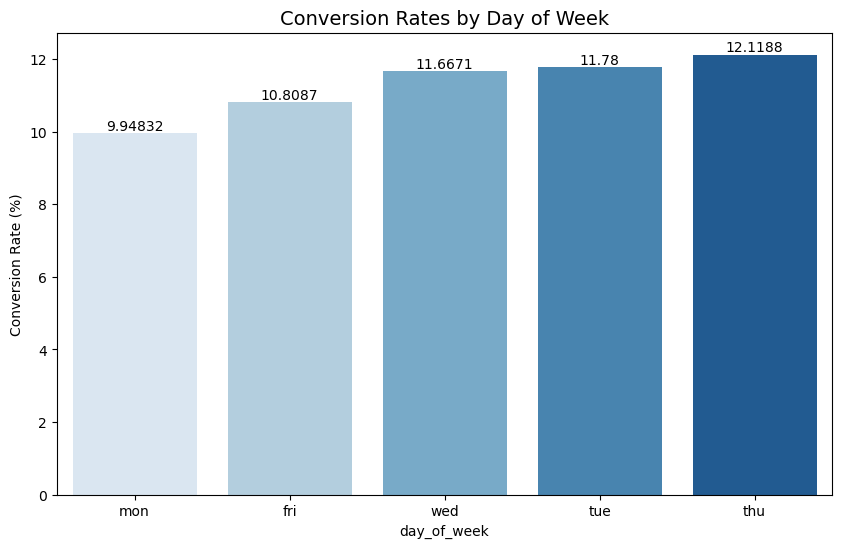

In [15]:
# impact on Conversion Rates by Day of approach
day_conv = df.groupby('day_of_week')['y_numeric'].mean().sort_values()

plt.figure(figsize=(10,6))
ax=sns.barplot(x=day_conv.index, y=day_conv.values*100, hue=day_conv.index,
            palette='Blues')
for cont in ax.containers:
    ax.bar_label(cont)
plt.title('Conversion Rates by Day of Week', fontsize=14)
plt.ylabel('Conversion Rate (%)')
plt.show()

The data reveals distinct weekly conversion patterns, with Thursday (12.1%) emerging as the strongest day for conversions, thus allocation of 25-30% of weekly outreach efforts on thursday will yield better results. Tuesday (11.8%) and Wednesday (11.6%) demonstrate consistently strong performance, making them ideal for scheduling important follow-ups and new contacts. Conversely, Monday (9.9%) shows significantly lower conversion rates, thus reduce call volumes on mondays.

#### Term Deposit Conversion Rates By Month Of Approach

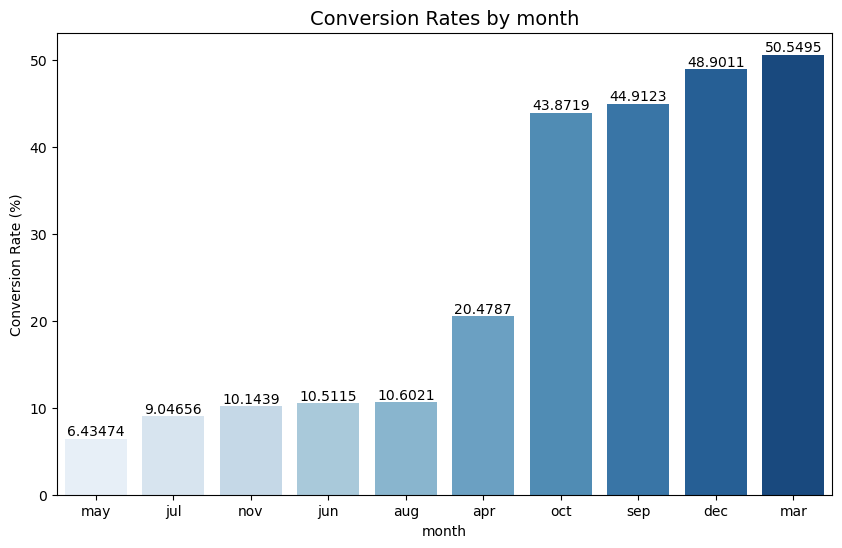

In [16]:
# impact on Conversion Rates by month of approach
month_conv = df.groupby('month')['y_numeric'].mean().sort_values()

plt.figure(figsize=(10,6))
ax=sns.barplot(x=month_conv.index, y=month_conv.values*100, hue=month_conv.index,
            palette='Blues')
for cont in ax.containers:
    ax.bar_label(cont)
plt.title('Conversion Rates by month', fontsize=14)
plt.ylabel('Conversion Rate (%)')
plt.show()

The data reveals strong seasonal trends, with March standing out as the peak month at 50.5% conversion, followed closely by September through December maintaining consistently high performance, likely driven by year-end financial planning and bonus allocations.Conversely, May & July demonstrate significantly weaker performance with conversion rates below 10%, potentially due to summer vacations and reduced financial activity. This clear seasonality suggests concentrating 60-70% of annual outreach efforts during the high-performing March and September-December periods.

#### Impact of Economic Factors on Conversion Rates

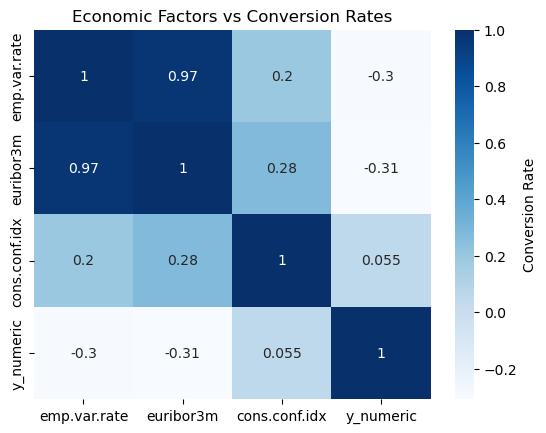

In [17]:
#impact of economic Factors on conversion Rates
corr = df[['emp.var.rate', 'euribor3m', 'cons.conf.idx', 'y_numeric']].corr()
sns.heatmap(corr, annot=True, cmap='Blues',  cbar_kws={'label': 'Conversion Rate'})
plt.title("Economic Factors vs Conversion Rates")
plt.show()

1. Higher employment volatility i.e employment variation rate resulted in lower conversions likely due to economic uncertainty
2. When interest rates of euribor3m go up, fewer people subscribe for term deposits
3. consumer confidence barely affects term deposit decisions

#### Impact Of Call Duration On Conversion Rates

C:\Users\bhavy\AppData\Local\Temp\ipykernel_7976\4253465198.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_conversion = df.groupby('duration_bin')['y_numeric'].agg(['mean', 'count'])
C:\Users\bhavy\AppData\Local\Temp\ipykernel_7976\4253465198.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='duration_bin', y='conversion_rate', data=bin_conversion,


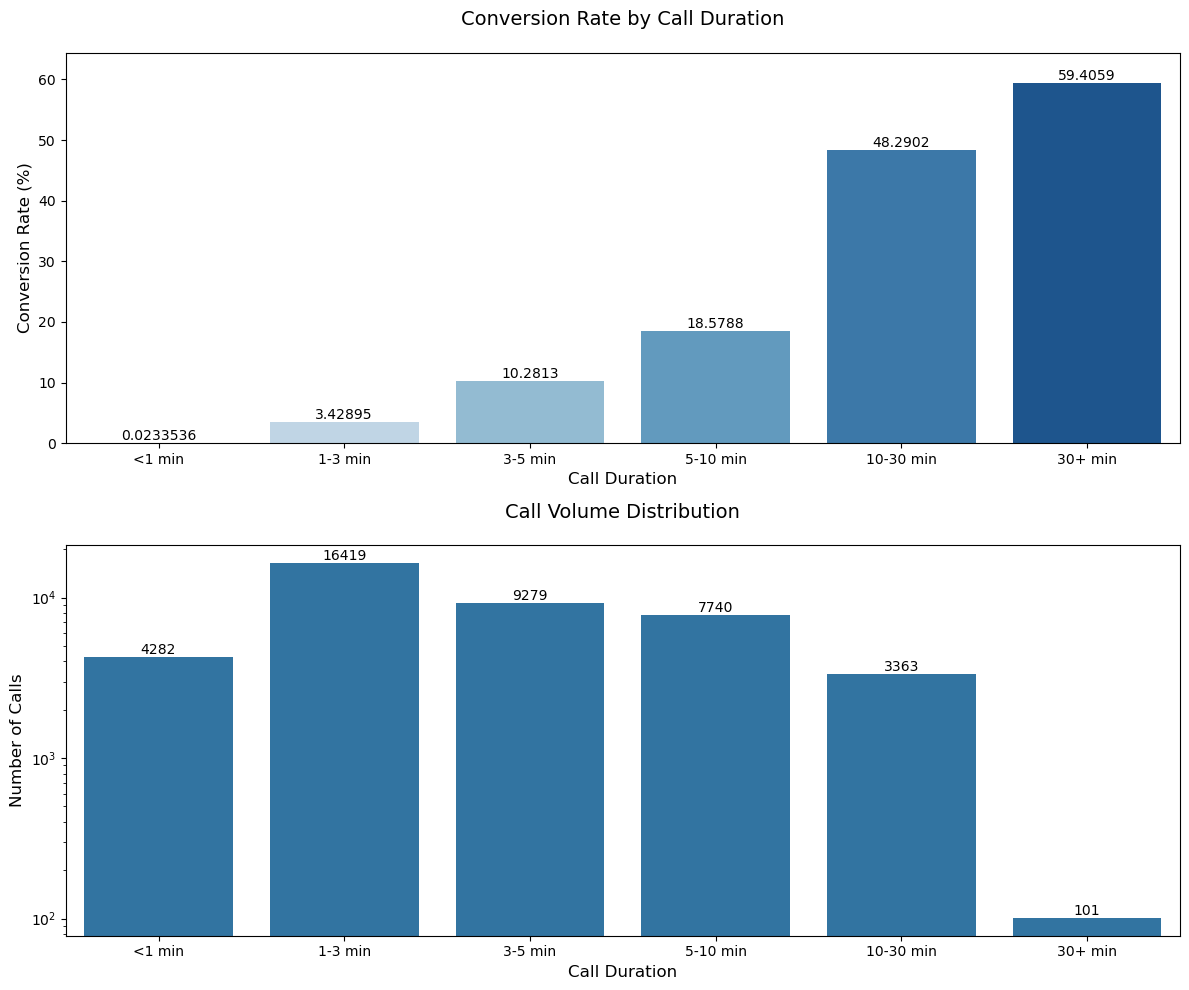

In [18]:
#Call Duration Analysis
duration_bins = [0, 60, 180, 300, 600, 1800, np.inf]
bin_labels = ['<1 min', '1-3 min', '3-5 min', '5-10 min', '10-30 min', '30+ min']
df['duration_bin'] = pd.cut(df['duration'], bins=duration_bins, labels=bin_labels)

# Calculate conversion rates per bin
bin_conversion = df.groupby('duration_bin')['y_numeric'].agg(['mean', 'count'])
bin_conversion['conversion_rate'] = bin_conversion['mean'] * 100
bin_conversion = bin_conversion.reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

#Conversion Rate by Call Duration
sns.barplot(x='duration_bin', y='conversion_rate', data=bin_conversion, 
            palette='Blues', ax=ax1)
for cont in ax1.containers:
    ax1.bar_label(cont)
ax1.set_title('Conversion Rate by Call Duration', fontsize=14, pad=20)
ax1.set_xlabel('Call Duration', fontsize=12)
ax1.set_ylabel('Conversion Rate (%)', fontsize=12)
ax1.set_ylim(0, bin_conversion['conversion_rate'].max() + 5)


#Call Volume Distribution 
sns.barplot(x='duration_bin', y='count', data=bin_conversion, 
             ax=ax2)
for c in ax2.containers:
    ax2.bar_label(c)
ax2.set_title('Call Volume Distribution', fontsize=14, pad=20)
ax2.set_xlabel('Call Duration', fontsize=12)
ax2.set_ylabel('Number of Calls', fontsize=12)
ax2.set_yscale('log') 

plt.tight_layout()
plt.show()



While 30+ minute calls show the highest conversion (59.4%), they represent only 101 calls and cannot be reliably targeted since call duration is unpredictable. Instead, opting for realistic duration i.e 5-10 minute calls convert at around 23% a achievable duration through training and process improvements

#### Term Deposit Conversion Rates by Loan Status

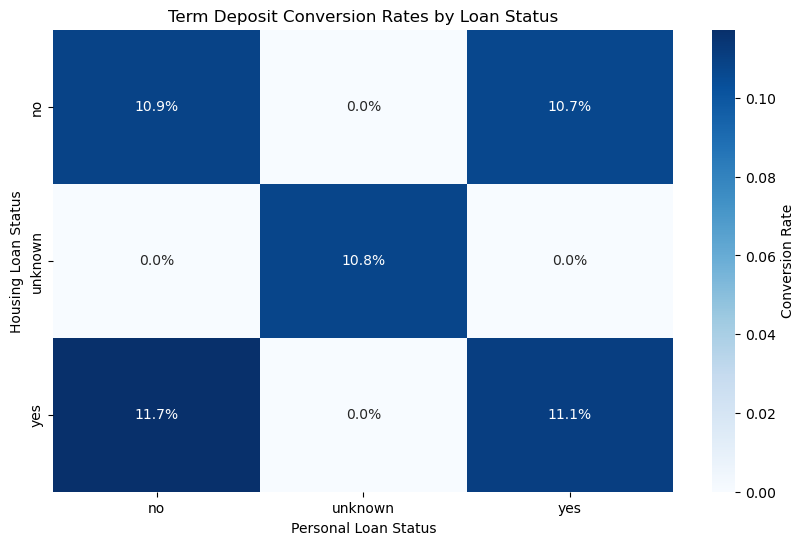

In [19]:
# Impact of campign with clients with and without loans and type of loans
loan_conv = df.groupby(['housing', 'loan'])['y_numeric'].mean().unstack()
loan_conv = loan_conv.fillna(0)

#creating a heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(loan_conv , annot=True, fmt='.1%', cmap='Blues',
            cbar_kws={'label': 'Conversion Rate'})
plt.title('Term Deposit Conversion Rates by Loan Status')
plt.xlabel('Personal Loan Status')
plt.ylabel('Housing Loan Status')

plt.show()



1. Highest conversion (11.7%) occurs for clients with housing loans but no personal loans
2. Lowest conversion (10.7%) occurs for clients with personal loans but no housing loan 
3. Clients with both loans convert at 11.1%
4. Clients with neither loan convert at 10.9%

### Model Building

In [20]:
#Converting categorical features into binary columns (one-hot encoding) 
categ_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
              'contact', 'month', 'day_of_week', 'poutcome']
df_encoded = pd.get_dummies(df, columns=categ_cols, drop_first=True)

In [21]:
#Feature selection 
#Removing duration as that feature is unpredictable
X = df.drop(['y_numeric', 'duration'], axis=1) 
y = df['y_numeric']
# Numerical columns to keep 
num_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
            'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
X = df_encoded[num_cols + 
              [col for col in df_encoded.columns 
               if col.startswith(tuple(categ_cols)) and col not in num_cols]]
y = df_encoded['y_numeric']




In [22]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#Scaling 
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [23]:
# 4. Model Training & Evaluation

# Logistic Regression
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:,1]

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_lr):.3f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=5,
    class_weight='balanced_subsample',
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_rf):.3f}")
print("\nTop 5 Features:")
print(pd.Series(rf.feature_importances_, index=X.columns)
       .sort_values(ascending=False).head(5))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7303
           1       0.35      0.61      0.45       935

    accuracy                           0.83      8238
   macro avg       0.65      0.73      0.67      8238
weighted avg       0.88      0.83      0.85      8238

AUC-ROC: 0.781
Confusion Matrix:
[[6250 1053]
 [ 366  569]]

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7303
           1       0.39      0.59      0.47       935

    accuracy                           0.85      8238
   macro avg       0.67      0.74      0.69      8238
weighted avg       0.88      0.85      0.86      8238

AUC-ROC: 0.790

Top 5 Features:
euribor3m         0.169175
nr.employed       0.163627
emp.var.rate      0.153770
cons.conf.idx     0.081714
cons.price.idx    0.059473
dtype: float64


The model demonstrates strong ability to filter non-subscribers (94% precision) but struggles to reliably identify potential subscribers (only 37% precision), indicating high false positive rates where 6 out of 10 predicted "yes" leads may not convert. Key economic indicators are particularly interest rates (euribor3m) and employment figures emerge as dominant predictors, suggesting customer decisions heavily depend on macroeconomic conditions.The Random Forest’s slightly higher precision suggests it may be 5% better at reducing wasted outreach efforts, but both models still miss 40% of actual subscribers.



#### Key Insights
1. Customer Segmentation
   
Top Performers:
>Past successful clients (65% conversion)

>Students (31.4%) and retirees (25.2%)

Underperformers:
>Blue-collar (6.9%) and service workers (8.1%) → Consider deprioritization
>
>Mid-career clients (30–50 years: 9.1% conversion) → Needs flexible product offerings

2. Temporal Trends
   
>Best Days: Thursday (12.1%), Tuesday–Wednesday (11.6–11.8%) → Allocate 25–30% of weekly outreach to Thursdays
>
>Worst Day: Monday (9.9%) → Reduce call volume by 15–20%

Seasonality:
>Peak Months: March (50.5%), September–December (45–49%) → Concentrate 60–70% of annual efforts here
>
>Low Seasons: May–July (<10%) → Minimal outreach

3. Economic Drivers
>Negative Impact:
Higher interest rates (euribor3m: -0.31 correlation),Employment volatility (emp.var.rate: -0.30 correlation)
>
>Neutral: Consumer confidence (cons.conf.idx: +0.05) → Minimal influence

4. Model Performance
>Strengths:
94% precision in identifying non-subscribers (reduces wasted effort), Random Forest marginally outperforms Logistic Regression (AUC 0.790 vs. 0.781)
>
>Limitations:
Low precision for subscribers (37–39%) → 6/10 "yes" predictions are false alarms
Misses 40% of actual subscribers

#### Recommendations

1. Resource Allocation:

Prioritize high-converting segments (students, retirees, past successes)

Deprioritize blue-collar/service workers and low-season months (May–July)

2. Campaign Timing:

Focus calls on Thursdays and Q4 (September–December)


3. Product Design:

Optimize Operations by Streamlining calls to the 5–10 minute range with better training and scripting.

Offer flexible terms for mid-career clients (30–50 years)

Align deposit rates with euribor3m trends 
